# Arranging data

Here we will demonstrate how to cut a desired region from a large data source, how to load new data to the database, and how to get saved data.

## Cutting the desired region

Two sources for the topography tool's data are currently available in hera-data. They may be added to the current project using the next commands:

hera-data-load documentation Topography BNTL

hera-data-load documentation Topography SRTM

Here, "documentation" is the project name, "Topography" is the type of the data and "BNTL"/"SRTM" is the source.

Both sources hold data of whole Israel, which is too large to handle.
Therefore, one usually has to cut a desired region from the source.
This is done using the next procedure:

In [1]:
from hera import toolkitHome
import geopandas
import pandas

projectName = "documentation"
toolkitName = "GIS_Topography"
Topography = toolkitHome.getToolkit(projectName=projectName,toolkitName=toolkitName)

pointsBNTL = [263000,765000,266000,768000]
pointsSRTM = [35.670,32.979,35.702,33.006]
regionName = "Katsrin"
# KatsrinDocBNTL = Topography.makeRegion(points=pointsBNTL, regionName=regionName, saveMode=None, dataSourceOrFile="BNTL", dataSourceVersion="1")
# KatsrinDocSRTM = Topography.makeRegion(points=pointsSRTM, regionName=regionName, saveMode=None, dataSourceOrFile="SRTM", dataSourceVersion="1")

The "makeRegion" function returns the name of the file of the new region if the saveMode doesn't include adding to the database.
If the new file is added to the database, the function returns its document.

The "BNTL" data is loaded as a geodataframe of shapely linestrings representing contour lines. 
The "SRTM" data is loaded as a pandas dataframe of heights for different sets of x/y coordinates.

We will load examples files directely from the examples directory in order to demostrate the two kinds of data.

,FCODE,FTYPE,HEIGHT,ORIG_LEN,SHAPE_Leng,geometry
0,611,12,230,119163.430745,119163.430745,"MULTILINESTRING ((263609.072 765000.000, 26360..."
1,611,11,235,78.020414,78.020414,"MULTILINESTRING ((263014.006 765006.006, 26301..."
2,611,11,235,49.780628,49.780628,"MULTILINESTRING ((263010.475 765092.000, 26300..."
3,611,11,235,119354.375478,119354.375478,"MULTILINESTRING ((263672.879 765000.000, 26367..."
4,611,13,240,84246.297587,84246.297587,"MULTILINESTRING ((264313.610 765000.000, 26431..."
5,611,11,245,24.245031,24.245031,"LINESTRING (263098.178 765592.000, 263096.902 ..."
6,611,11,245,48.580856,48.580856,"LINESTRING (263272.076 765548.000, 263268.581 ..."
7,611,11,245,84147.781363,84147.781363,"MULTILINESTRING ((264362.848 765000.000, 26436..."
8,611,18,250,342.540894,342.540894,"LINESTRING (263749.716 765456.000, 263748.933 ..."
9,611,18,250,53679.737512,53679.737512,"MULTILINESTRING ((264465.965 765000.000, 26446..."


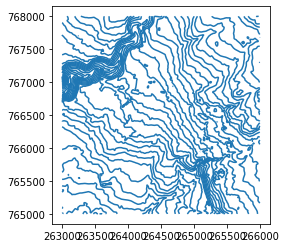

In [2]:
katsrinBNTL = geopandas.read_file("examples/Katsrin/CONTOUR.shp")
katsrinBNTL.plot()
katsrinBNTL[:10]

,yWGS84,xWGS84,height,x,y
index,,,,,
0,33.006226,35.670090,313,262963.829172,767994.659629
1,33.006226,35.670368,312,262989.791537,767994.774584
2,33.006226,35.670645,311,263015.753903,767994.889606
3,33.006226,35.670923,313,263041.716269,767995.004698
4,33.006226,35.671201,314,263067.678635,767995.119858
5,33.006226,35.671479,314,263093.641002,767995.235086
6,33.006226,35.671757,316,263119.603370,767995.350383
7,33.006226,35.672035,320,263145.565737,767995.465749
8,33.006226,35.672312,326,263171.528105,767995.581183


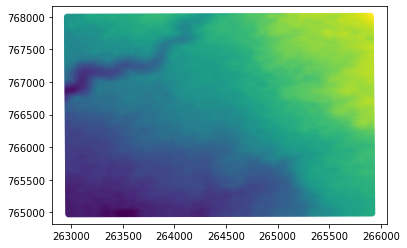

In [3]:
import pandas
import matplotlib.pyplot as plt
katsrinSRTM = pandas.read_parquet("examples/KatsrinSRTM.parquet")
plt.scatter(katsrinSRTM.x,katsrinSRTM.y,c=katsrinSRTM.height)
katsrinSRTM[:10]

The points parameter holds the coordinates of the bounds of the region. 
It may be a list, as demonstrated above, a geopandas dataframe, for which the bounds are used for the new region, or a dictionary
of the following structure:

In [4]:
points = {"minX":263000, "minY":765000, "maxX":266000, "maxY":768000}

The regionName parameter is the name used to save the new file.
The dataSourceOrFile and dataSourceVersion parameters are None by default, in which case the most updated version and source are used.
For a specific source or version, the name of the source and version, as demonstrated above for sources "BNTL" and "SRTM and version "1".
The dataSourceOrFile may also be a direct path of a file from which the region may be cut.
Currently, the available file types for topography are shapefile (shp) and tif.

For instance,

In [5]:
points = {'minX': 264000, 'minY': 766000, 'maxX': 265000, 'maxY': 767000}
regionName = "KatsrinSmall"
KatsrinDoc = Topography.makeRegion(points=points, regionName=regionName, saveMode="DB_overwrite", dataSourceOrFile="examples/Katsrin/CONTOUR.shp")
KatsrinDoc

'KatsrinSmall'

Any additional descriptors of the data may be given in the additionalData parameter in dict format.
These descriptors are saved to the database when the save mode includes saving to database.

A region may also be made using a saved shape in the database.
For example, we will add a set of points around Katsrin to the database as documented at the shapes tool documentation, and use it to cut a region.

In [9]:
toolkitName = "GIS_Shapes"
shapes  = toolkitHome.getToolkit(projectName=projectName,toolkitName=toolkitName)

location = "aroundKatsrin"
data = pandas.DataFrame({"Location":location,"Longitude":[263500,263500,265500,265500],"Latitude":[766600,767000,767000,766600]})
geoData = geopandas.GeoDataFrame(data,geometry=geopandas.points_from_xy(data.Longitude,data.Latitude))
loadedData = shapes.loadData(fileNameOrData=geoData, saveMode="DB_overwrite", regionName=location, additionalData=dict(units="ITM"))

KatsrinDoc = Topography.makeRegionByShapeName(shapeNameOrArea=location, regionName=location, saveMode=None, dataSourceOrFile="examples/Katsrin/CONTOUR.shp")
KatsrinDoc

'aroundKatsrin'

## Loading new data

New data may be loaded to the database.
The loading function recieves either the name of the file or the data itself as a geodataframe as the input data.
For example:

In [10]:
fileName = "Saved-File-Directory"
saveMode = "SaveMode"
descriptors = {} # any descriptors of the data
# Topography.loadData(fileNameOrData = fileName, saveMode=saveMode, regionName=regionName, additionalData=descriptors)

## Getting stored data

A list of existing regions is available using the next function:

In [6]:
Topography.getRegionNameList()

['KatsrinSmall']

A region may be retrieved using its name:

In [7]:
Topography.getRegionByName("KatsrinSmall")[:2]

,FCODE,FTYPE,HEIGHT,ORIG_LEN,SHAPE_Leng,geometry
0,611,13,280,80754.725121,80754.725121,"LINESTRING (264478.485 766000.000, 264478.417 ..."
1,611,11,285,50178.520593,50178.520593,"LINESTRING (264000.000 766152.853, 264001.389 ..."


Regions may also be retrieved by points that they contain.
The searched point should be a list/tuple of x/y coordinates or a shapely.geometry.Point.

In [8]:
point = [264500, 766500]

Topography.getRegionDocumentByPoints(point=point)

[<Measurements: Measurements object>]

In addition, the height at a poiny may be retrieved using the getHeight function. 
Before using the function, a data source should be added to the DB, for example using data-hera, in which the USGS source is available:

hera-data-load documentation Topography USGS

Then, the function may be called using the source.

In [2]:
height = Topography.getHeight(longitude=34.5,latitude=30.5,source="USGS")